In [1]:
# TODO

# make a list of tickers to show and tickers to build
# list to build: list to show plus 
# list to show: combo's + list to show

# get all stocks from sp500, aex and 100 most used etf's and download then on a schedule

# check which stocks are downloaded and make a searchable multiselect user input


In [1]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time
import os
from datetime import datetime

# make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
# set key var
with open('.key') as f: key = f.read()

In [2]:
# set user vars

download_symbols=['QQQ','SPY','GOOGL','GOLD','VTI','VGLT']

force_download_day = False
list_symbols=['SPY','VGLT','GOLD']
combo_deals = {'combo1':{'SPY':70,'VGLT':20,'GOLD':10},'combo2':{'SPY':30,'VGLT':30,'GOLD':40}}
start_date = "2015-01-01"
end_date = "now"

In [3]:
# convert now to timestamp
if end_date == "now":
    end_date = datetime.today().strftime('%Y-%m-%d')

In [4]:
# save data to files

# download daily, and add returns column

## Bouw hier nog een check of de data al aanwezig is!

if force_download_day:

    n=0
    for ticker in download_symbols:  
        if n > 4:
            print("sleeping for 60 seconds to prevent api limit")
            time.sleep(60)
        ts = TimeSeries(key=key, output_format='pandas')
        data, meta_data = ts.get_daily_adjusted(symbol=ticker, outputsize='full')
        data['returns'] = (data['4. close']/data['4. close'].shift(-1)) - 1
        # reverse dataset
        data= data.loc[::-1]
        data.to_csv(r'./data/day/'+ticker+".csv",index=True)
        print("saved "+ticker+" to csv")
        n+=1

In [7]:
# listing all files
import glob
list_files = glob.glob("data/day/*")
clean_files = []
for file in list_files:
    clean_files.append(file[9:-4])

ticker_options =[]
for ticker in sorted(clean_files):
    ticker_options.append({'label': ticker, 'value': ticker})
    


[{'label': 'GOLD', 'value': 'GOLD'}, {'label': 'GOOGL', 'value': 'GOOGL'}, {'label': 'QQQ', 'value': 'QQQ'}, {'label': 'SPY', 'value': 'SPY'}, {'label': 'VGLT', 'value': 'VGLT'}, {'label': 'VTI', 'value': 'VTI'}]


In [6]:
# print graphs from daily



data = []
for ticker in list_symbols:
    df = pd.read_csv("./data/day/"+ticker+".csv",index_col="date", parse_dates=True)
    # let op, hier omgekeerd? -> omdat de data van nieuw naar oud gaat...
    df = df.loc[end_date:start_date]
    #plt.plot(df["4. close"],label=ticker
    data.append({'x': list(df.index.strftime("%m-%d-%Y")), 'y': list(df['4. close']), 'type': 'line', 'name': ticker})

print(data)    


[{'x': [], 'y': [], 'type': 'line', 'name': 'SPY'}, {'x': [], 'y': [], 'type': 'line', 'name': 'VGLT'}, {'x': [], 'y': [], 'type': 'line', 'name': 'GOLD'}]


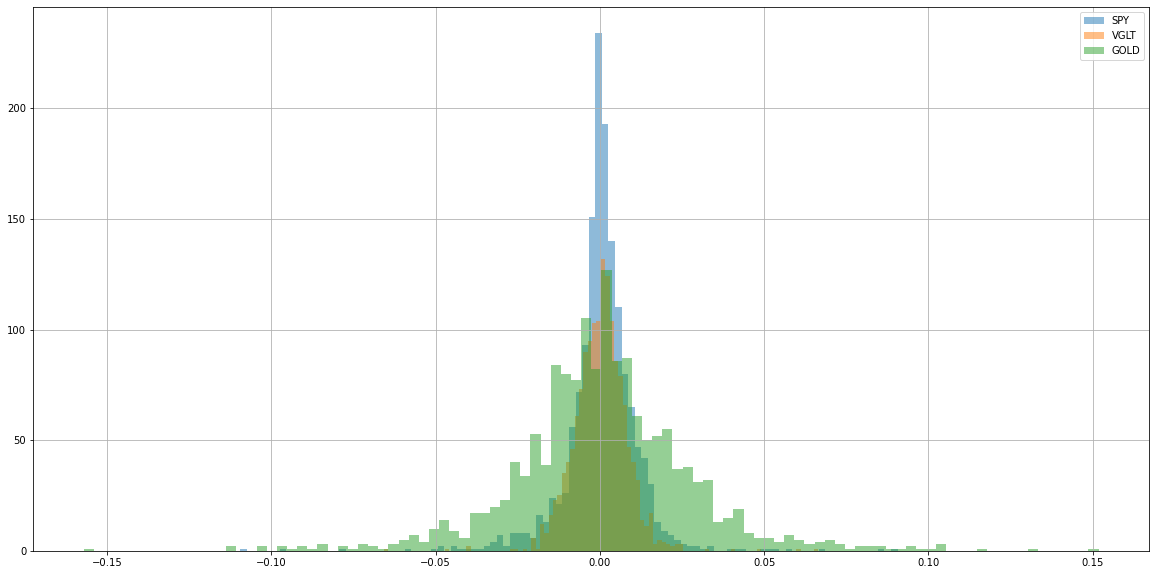

In [7]:
# histogram

for ticker in list_symbols:
    df = pd.read_csv("./data/day/"+ticker+".csv",index_col="date", parse_dates=True)
    df = df.loc[start_date:end_date]
    df['returns'].hist(bins=100,label=ticker,alpha=0.5)

plt.legend()


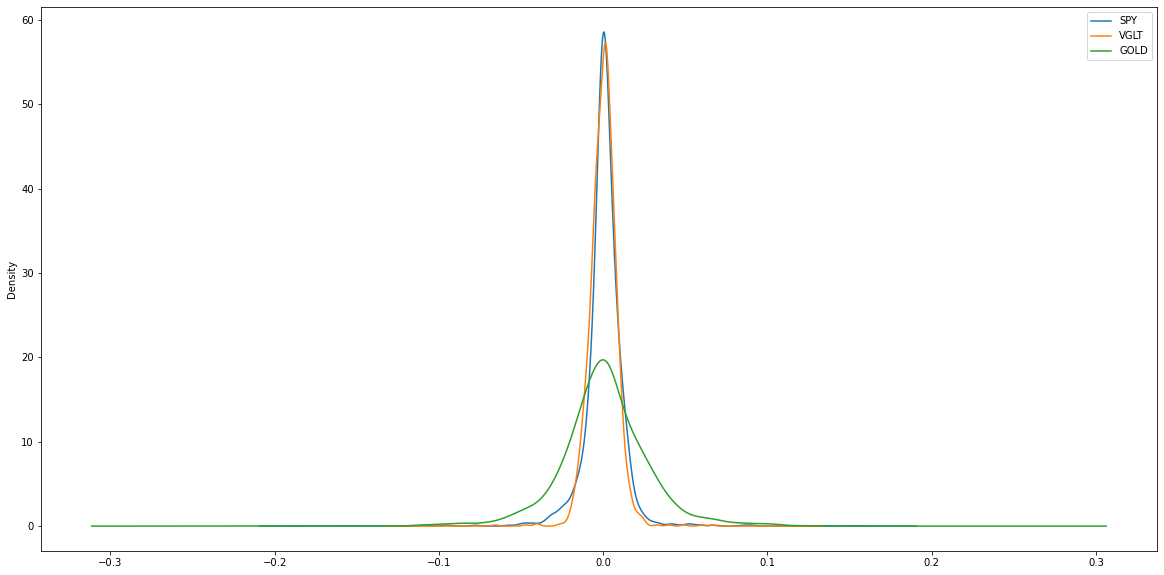

In [8]:
# kernel density estimation

# hier moving average voor gebruiken?

for ticker in list_symbols:
    df = pd.read_csv("./data/day/"+ticker+".csv",index_col="date", parse_dates=True)
    df = df.loc[start_date:end_date]
    df['returns'].plot(kind='kde',label=ticker)

plt.legend()

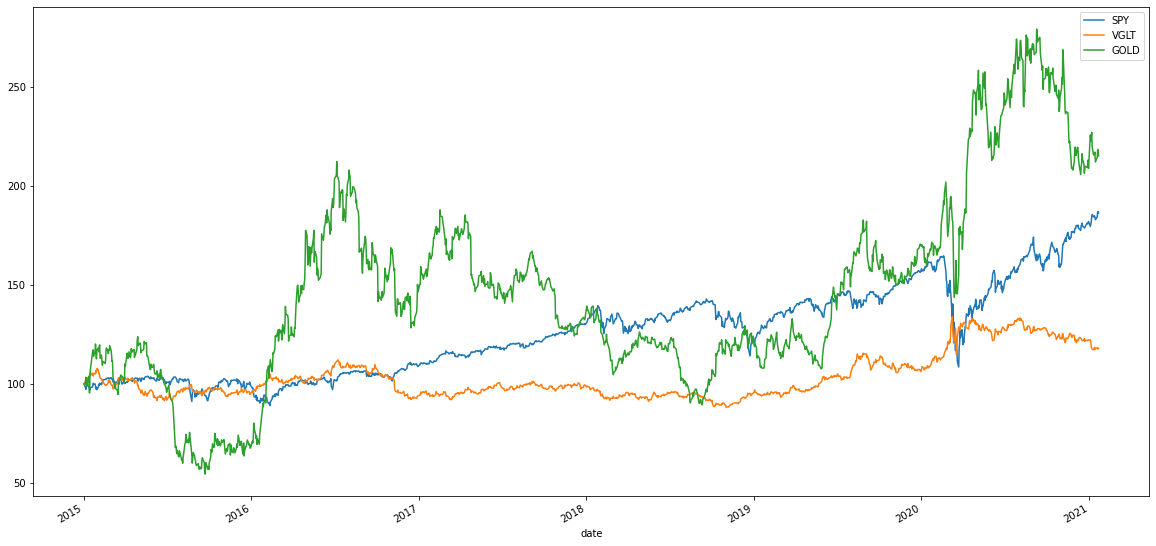

In [9]:
list_of_df = []
for ticker in list_symbols:
    df = pd.read_csv("./data/day/"+ticker+".csv",index_col="date", parse_dates=True)
    # let op, hier omgekeerd?
    df = df.loc[start_date:end_date]
    df = df[['4. close']]
    devider = df.iat[0,0]
    df[ticker] = df["4. close"]*100/devider
    df = df[[ticker]]
    list_of_df.append(df)
    

result = pd.concat(list_of_df, axis=1, join='outer')


result.plot()
    

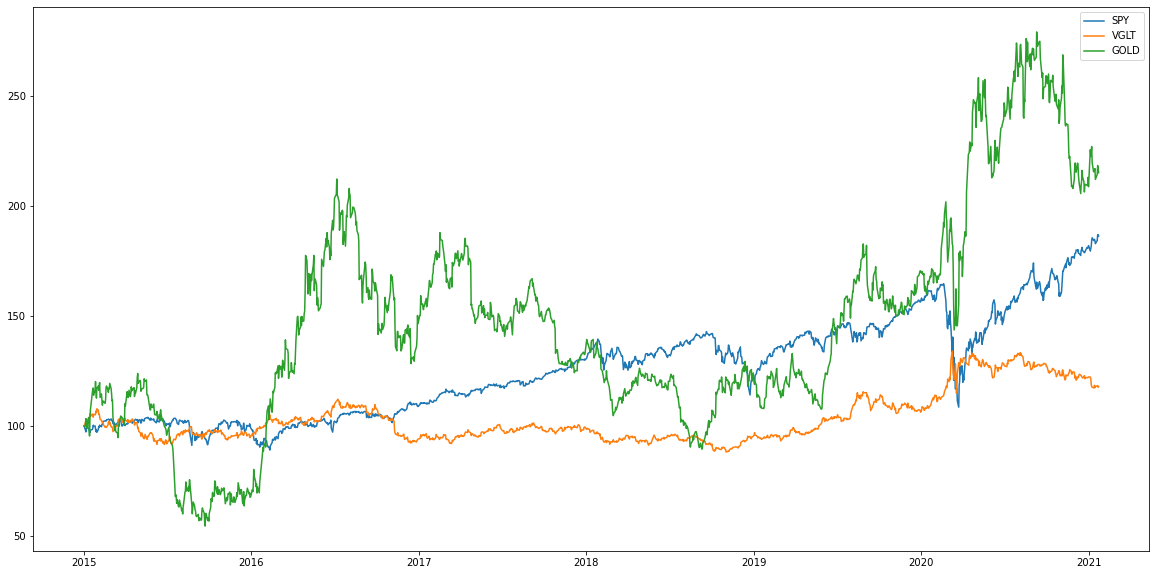

In [10]:
# print normalized graphs from daily
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column

for ticker in list_symbols:
    df = pd.read_csv("./data/day/"+ticker+".csv",index_col="date", parse_dates=True)
    # let op, hier omgekeerd? -> omdat de data van nieuw naar oud gaat...
    df = df.loc[start_date:end_date]
    df = df[['4. close']]
    devider = df.iat[0,0]
    df['corrected'] = df["4. close"]*100/devider
    plt.plot(df["corrected"],label=ticker)

plt.legend()

In [11]:
# gui links
# https://gist.github.com/holesond/b4f9db4b24eca00ef8b01a96c6e53a03

In [12]:



list_of_df = []
for ticker in list_symbols:
    df = pd.read_csv("./data/day/"+ticker+".csv",index_col="date", parse_dates=True)
    # let op, hier omgekeerd?
    df = df.loc[start_date:end_date]
    df = df[['4. close']]
    devider = df.iat[0,0]
    df[ticker] = df["4. close"]*100/devider
    df = df[[ticker]]
    list_of_df.append(df)
    

result = pd.concat(list_of_df, axis=1, join='outer')
for comboname,combostats in combo_deals.items():
    result[comboname] = 0
    for key in combostats:
        result[comboname] = result[comboname] + combostats[key]/100 * result[key]

result.head()
#result.plot()

SPY        VGLT        GOLD      combo1      combo2
date                                                                  
2015-01-02  100.000000  100.000000  100.000000  100.000000  100.000000
2015-01-05   98.194032  101.518051   99.908341   99.030267   99.876961
2015-01-06   97.269143  103.125399  103.299725   99.043452  101.438252
2015-01-07   98.481234  102.912361  101.924840   99.711820  101.188015
2015-01-08  100.228788  101.824212   99.083410  100.433335  100.249264

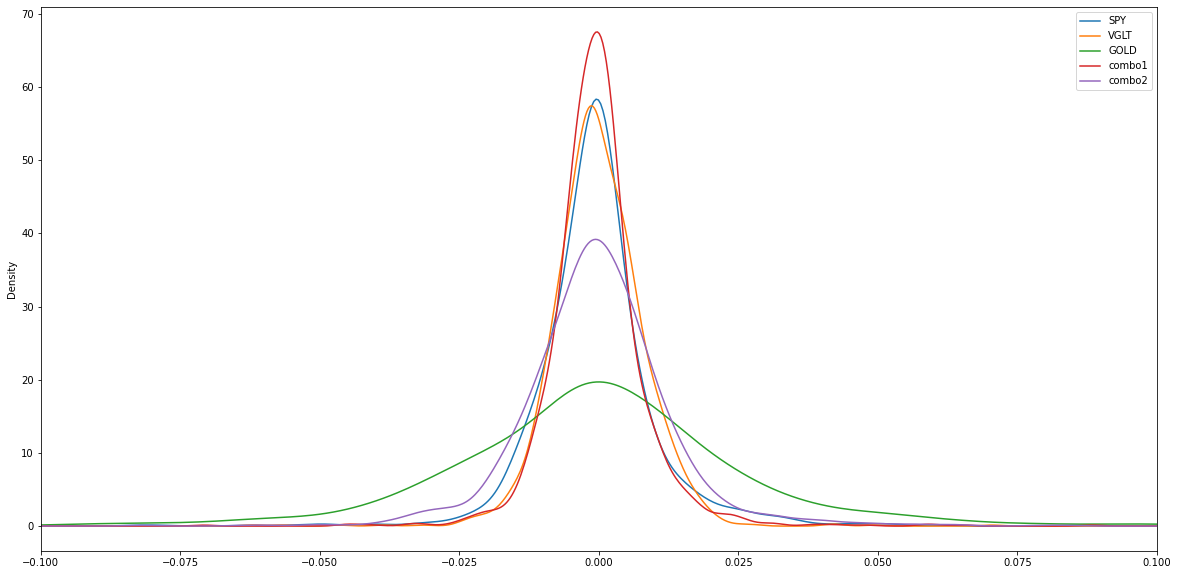

In [13]:



list_of_df = []
for ticker in list_symbols:
    df = pd.read_csv("./data/day/"+ticker+".csv",index_col="date", parse_dates=True)
    # let op, hier omgekeerd?
    df = df.loc[start_date:end_date]
    df = df[['4. close']]
    devider = df.iat[0,0]
    df[ticker] = df["4. close"]*100/devider
    df = df[[ticker]]
    list_of_df.append(df)
    

result = pd.concat(list_of_df, axis=1, join='outer')


for comboname,combostats in combo_deals.items():
    result[comboname] = 0
    for key in combostats:
        result[comboname] = result[comboname] + combostats[key]/100 * result[key]

for kolom in result:
    result[kolom] = (result[kolom]/result[kolom].shift(-1)) - 1

result.plot(kind='kde',xlim=(-0.1,0.1))

In [14]:
# cumulative gains

In [15]:
# rebalancing om de x maanden

In [16]:
# links
# https://www.youtube.com/watch?v=9fjs8FeLMJk

# dash
# https://www.youtube.com/watch?v=Ldp3RmUxtOQ&list=PLCDERj-IUIFCaELQ2i7AwgD2M6Xvc4Slf

# spreadsheet to graph
# https://www.youtube.com/watch?v=USTqY4gH_VM
    

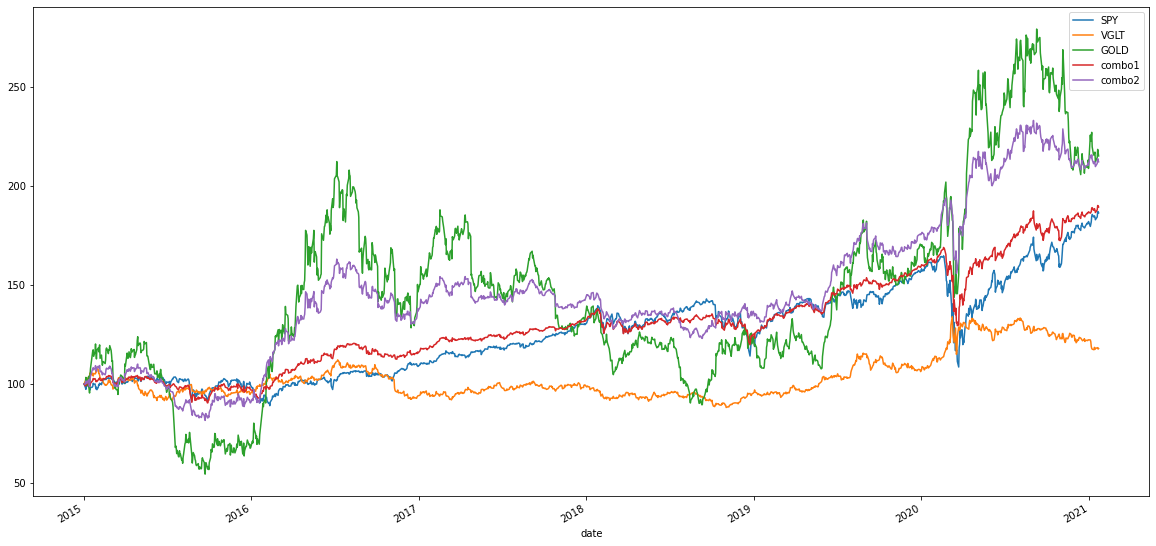

In [17]:
list_of_df = []
for ticker in list_symbols:
    df = pd.read_csv("./data/day/"+ticker+".csv",index_col="date", parse_dates=True)
    df = df.loc[start_date:end_date]
    df = df[['4. close']]
    devider = df.iat[0,0]
    df[ticker] = df["4. close"]*100/devider
    df = df[[ticker]]
    list_of_df.append(df)
    
result = pd.concat(list_of_df, axis=1, join='outer')

combo_deals = {'combo1':{'SPY':0.7,'VGLT':0.2,'GOLD':0.1},'combo2':{'SPY':0.3,'VGLT':0.3,'GOLD':0.4}}
days_balance = 90
# devide percentage by 100

#for comboname,combostats in combo_deals.items():
#    for key in combostats:
#        combo_deals[combostats] = combo_deals[combostats][key] / 100


# copy dict to edit
combo_deal_aantal = combo_deals.copy()

for comboname,combostats in combo_deals.items():
    # create empty column of floats
    result[comboname] = 0.0
    
    # create empty dict for counting
    count_shares = {}
    
    # fil dict with keys
    for key in combostats:
        count_shares[key] = combostats[key]

    
    # loop over rows, van begin tot einde
    # herbalancer per x dagen
    days_left = days_balance
    for row in result.itertuples():  
        # bereken waarde voor 
        for key in combostats:
        
        # bereken "shares" per aandeel
        # combostats[key] -> percentage item als 0-1
        # result.at[row.Index,comboname] -> waarde combi
        # key -> ticker naam
        # result.at[row.Index,key] -> waarde losse tickers
        # count_shares[key] -> aantal ticker
        
            #bereken totale waarde, nu is het aantal share nog staande van de dag ervoor
            result.at[row.Index,comboname] = result.at[row.Index,comboname] + count_shares[key] * result.at[row.Index,key]
        
        if days_left == 0:
        
            for key in combostats:       
            # recount, verzin hier nog een if statement voor
                count_shares[key] = combostats[key] * result.at[row.Index,comboname] / result.at[row.Index,key]
            days_left = days_balance
            continue    
        # reduce days left
        days_left -= 1
            
           
result.plot()


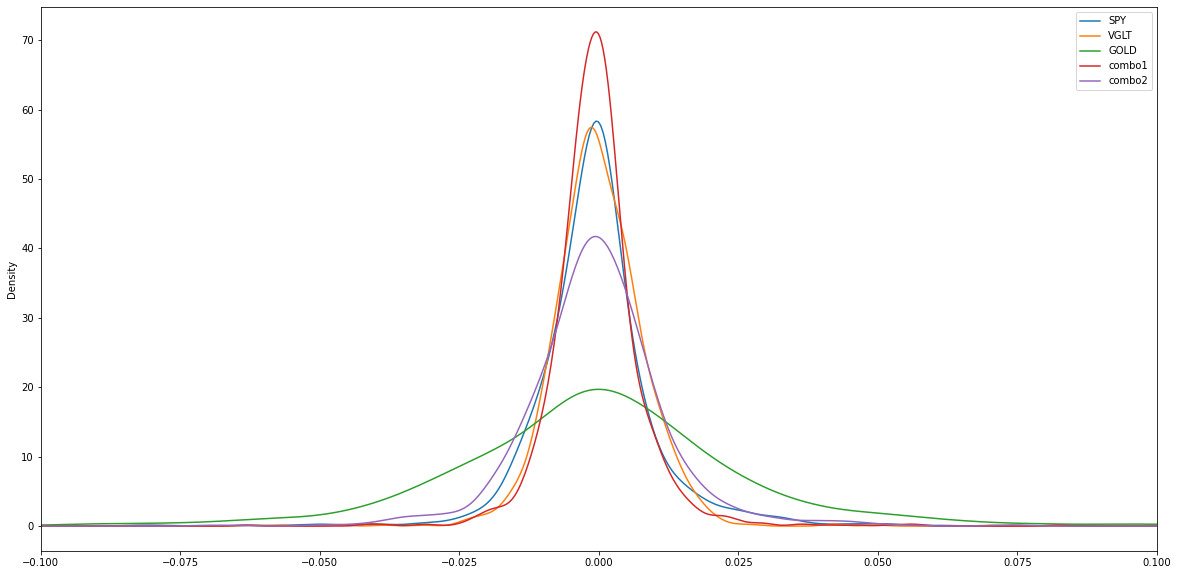

In [18]:
for kolom in result:
    result[kolom] = (result[kolom]/result[kolom].shift(-1)) - 1

result.plot(kind='kde',xlim=(-0.1,0.1)) 

                   SPY        VGLT        GOLD
date                                          
2015-01-02  100.000000  100.000000  100.000000
2015-01-05   98.194032  101.518051   99.908341
2015-01-06   97.269143  103.125399  103.299725
2015-01-07   98.481234  102.912361  101.924840
2015-01-08  100.228788  101.824212   99.083410
{'ratios': {'SPY': 0.7, 'VGLT': 0.2, 'GOLD': 0.1}, 'balance': 30}
{'ratios': {'SPY': 0.7, 'VGLT': 0.2, 'GOLD': 0.1}, 'balance': 10000}


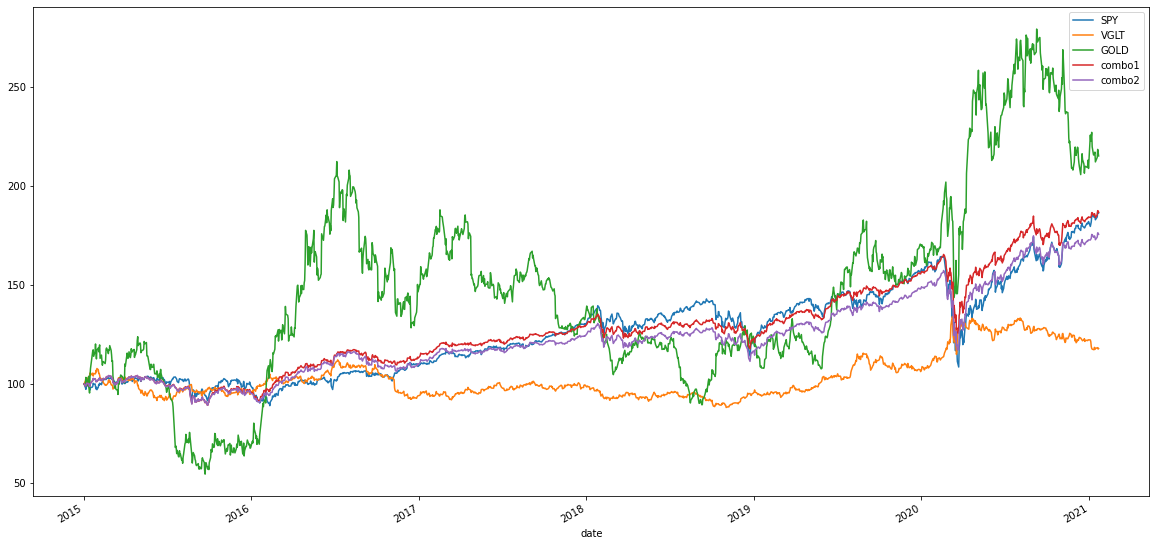

In [26]:
list_of_df = []
for ticker in list_symbols:
    df = pd.read_csv("./data/day/"+ticker+".csv",index_col="date", parse_dates=True)
    df = df.loc[start_date:end_date]
    df = df[['4. close']]
    devider = df.iat[0,0]
    df[ticker] = df["4. close"]*100/devider
    df = df[[ticker]]
    list_of_df.append(df)

result = pd.concat(list_of_df, axis=1, join='outer')
print(result.head())

combo_deals = {'combo1':{'ratios':{'SPY':0.7,'VGLT':0.2,'GOLD':0.1},'balance':30},'combo2':{'ratios':{'SPY':0.7,'VGLT':0.2,'GOLD':0.1},'balance':10000}}
#combo_deals = {'combo1':{'ratios':{'SPY':0.7,'VGLT':0.2,'GOLD':0.1},'balance':30},'combo2':{'ratios':{'ratios':{'SPY':0.7,'VGLT':0.2,'GOLD':0.1},'balance':100000}}}

for comboname,combostats in combo_deals.items():
    # create empty column of floats
    result[comboname] = 0.0
    
    # create empty dict for counting
    count_shares = {}
    
    # fil dict with keys
    for key in combostats['ratios']:
        count_shares[key] = combostats['ratios'][key]
    
    # loop over rows, van begin tot einde
    days_left = combostats['balance']
    for row in result.itertuples():  
        # bereken waarde voor 
        for key in combostats['ratios']:
        
        # bereken "shares" per aandeel
        # combostats[key] -> percentage item als 0-1
        # result.at[row.Index,comboname] -> waarde combi
        # key -> ticker naam
        # result.at[row.Index,key] -> waarde losse tickers
        # count_shares[key] -> aantal ticker
        
            #bereken totale waarde, nu is het aantal share nog staande van de dag ervoor
            result.at[row.Index,comboname] = result.at[row.Index,comboname] + count_shares[key] * result.at[row.Index,key]
        
        if days_left == 0:
        
            for key in combostats['ratios']:       
            # recount, verzin hier nog een if statement voor
                count_shares[key] = combostats['ratios'][key] * result.at[row.Index,comboname] / result.at[row.Index,key]
            days_left = combostats['balance']
            
            continue
        # reduce days left
        days_left -= 1
                       
result.plot()


In [27]:
for kolom in result:
    result[kolom] = (result[kolom]/result[kolom].shift(-1)) - 1

result.plot(kind='kde',xlim=(-0.1,0.1)) 